In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

dataset = 'dataset.csv'

df = pd.read_csv(dataset)

df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [2]:
df.shape

(3000, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [8]:
df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [9]:
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [13]:
df[['codigo_bairro', 'codigo_localidade']] = df[['codigo_bairro', 'codigo_localidade']].apply(str)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   object 
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 164.2+ KB


In [14]:
df.describe()

,valor_aluguel,area_m2,ano_construcao,numero_banheiros,numero_cozinhas
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,0.061333,0.042000
std,195.865692,23.675758,22.288136,0.239981,0.200623
min,40.512820,20.000000,1918.000000,0.000000,0.000000
25%,320.961530,51.000000,1939.000000,0.000000,0.000000
50%,426.897435,65.000000,1959.000000,0.000000,0.000000
75%,560.282055,81.000000,1972.000000,0.000000,0.000000
max,1843.384600,160.000000,1997.000000,1.000000,1.000000


In [15]:
df['valor_aluguel'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

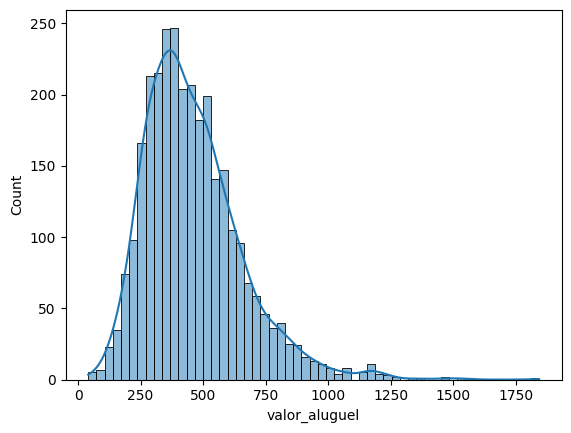

In [16]:
sns.histplot(data = df, x = 'valor_aluguel', kde = True)

In [17]:
df.corr()

C:\Users\gusta\AppData\Local\Temp\ipykernel_18440\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,valor_aluguel,area_m2,ano_construcao,numero_banheiros,numero_cozinhas
valor_aluguel,1.000000,0.584878,0.139194,0.250261,0.170707
area_m2,0.584878,1.000000,-0.226581,0.226306,0.045716
ano_construcao,0.139194,-0.226581,1.000000,0.065824,0.109881
numero_banheiros,0.250261,0.226306,0.065824,1.000000,0.064216
numero_cozinhas,0.170707,0.045716,0.109881,0.064216,1.000000


<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

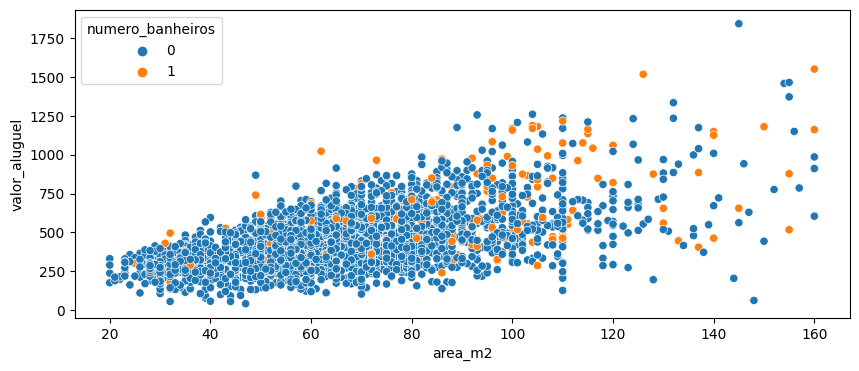

In [28]:
plt.figure(figsize = (10, 4))
sns.scatterplot(data = df, x = 'area_m2', y = 'valor_aluguel', hue = 'numero_banheiros')


<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

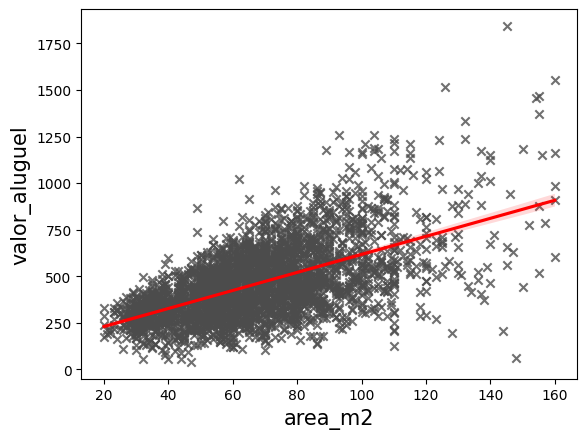

In [42]:
plt.xlabel('Area em M²', size = 15)
plt.ylabel('Valor do Aluguel', size = 15)
sns.regplot(data = df, x = 'area_m2', y = 'valor_aluguel', line_kws=dict(color="r"),  marker="x", color=".3")

In [38]:
# y = aX + b + erro

y = df['valor_aluguel']
X = df['area_m2']
X = sm.add_constant(X)

modelo = sm.OLS(y, X)

In [39]:
resultado = modelo.fit()

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          6.84e-275
Time:                        15:38:12   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

## Interpretando o Resultado do Modelo Estatístico com Statsmodels

#### P: nível de significancia estatística (geralmente alfa = 95%). quanto mais perto de zero, mais o modelo consegue explicar a variável alvo

A tabela acima traz um resumo do modelo com diversas estatísticas. Aqui faremos a análise de uma delas, o R².

O coeficiente de determinação, também conhecido como R², é uma medida estatística que avalia o quão bem o modelo de regressão se ajusta aos dados observados. Ele varia de 0 a 1 e representa a proporção da variação total da variável dependente que é explicada pelo modelo de regressão.

A interpretação do R² é a seguinte:

R² = 0: Neste caso, o modelo de regressão não explica nenhuma variação na variável dependente. Isso significa que o modelo não é útil para prever ou explicar a variável de interesse.

R² = 1: Neste caso, o modelo de regressão explica toda a variação na variável dependente. Isso indica que o modelo se ajusta perfeitamente aos dados e é extremamente útil para prever ou explicar a variável de interesse.

0 < R² < 1: Neste caso, o modelo de regressão explica uma parte da variação na variável dependente. Quanto maior o valor de R², melhor o modelo se ajusta aos dados e melhor é a sua capacidade de prever ou explicar a variável de interesse.

É importante notar que um R² alto não garante que o modelo seja adequado, nem que haja uma relação causal entre as variáveis. Um R² alto pode ser resultado de variáveis irrelevantes, multicolinearidade ou até mesmo de um ajuste excessivo (overfitting). Portanto, é essencial avaliar outras estatísticas e diagnosticar o modelo antes de tirar conclusões definitivas.